# Stop words estimation from document frequency

Very preliminary discussion for [scikit-learn/scikit-learn#10834](https://github.com/scikit-learn/scikit-learn/issues/10834)

The corpus consists of 11314 documents from the 20 newsgroups dataset. The BoW vectorization produces a vocabulary with 101631 words. 

In [13]:
import numpy as np
import pandas as pd

from sklearn.datasets import fetch_20newsgroups

from sklearn.feature_extraction.stop_words import ENGLISH_STOP_WORDS
from sklearn.feature_extraction.text import CountVectorizer, _document_frequency

import matplotlib.pyplot as plt

In [14]:
%matplotlib inline

In [15]:
newsgoups = fetch_20newsgroups(remove=('headers', 'footers', 'quotes'))

In [16]:
vect = CountVectorizer()
X = vect.fit_transform(newsgoups.data)

df_raw = _document_frequency(X)

In [17]:
X

<11314x101631 sparse matrix of type '<class 'numpy.int64'>'
	with 1103627 stored elements in Compressed Sparse Row format>

For reference, below is the stop words list currently included in scikit-learn,

In [18]:
print('len(ENGLISH_STOP_WORDS) =', len(ENGLISH_STOP_WORDS))

' '.join(ENGLISH_STOP_WORDS)

len(ENGLISH_STOP_WORDS) = 318


'moreover with could thence every once others describe fifty first thereupon within anyone beyond none anywhere go yours sincere become often top what wherein been but thru has otherwise always besides can below find ltd during these fire who whom nothing under almost though couldnt five least yourself sixty inc how the anything con him mill will ours ourselves seem somehow much down beside hereby meanwhile well sometime became more all this eight across ten latter among up whose do might while due keep per sometimes is everywhere in system less throughout thus somewhere we therein indeed same its hundred nobody those eg off at please toward whenever except re after last as give by something between beforehand not formerly onto someone a thick front without afterwards there rather call before put himself un it made ever even whence any nevertheless becoming his myself whereby so only towards four further detail upon because either etc amoungst hasnt few or amount am see are eleven noon

In [19]:
vocabulary = vect.get_feature_names()
df = pd.Series(dict(zip(vocabulary, df_raw))).to_frame('df')

In [20]:
df['max_df'] = df.df / X.shape[0]

df['is_stop_word'] = df.index.isin(ENGLISH_STOP_WORDS).astype('int')

df = df.sort_values('df', ascending=False)
df['rank_'] = np.arange(len(df)) + 1

df.head(100)

,df,max_df,is_stop_word,rank_
the,9475,0.837458,1,1
to,8465,0.748188,1,2
and,7775,0.687202,1,3
of,7674,0.678275,1,4
in,7106,0.628071,1,5
is,7028,0.621177,1,6
it,6689,0.591214,1,7
that,6580,0.581580,1,8
for,6294,0.556302,1,9
this,5273,0.466060,1,10


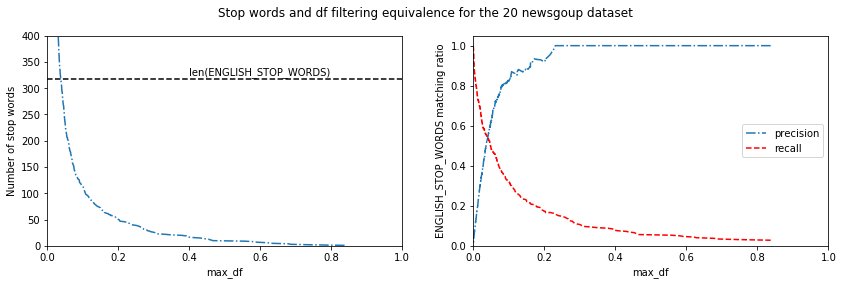

In [31]:
fig, ax = plt.subplots(1, 2, figsize=(14, 4))
fig.subplots_adjust(bottom=0.15)

ax[0].plot(df.max_df.values, df.rank_.values, '-.')
ax[0].set_ylim(0, 400)
ax[0].set_xlabel('max_df')
ax[0].set_ylabel('Number of stop words')
ax[0].hlines(len(ENGLISH_STOP_WORDS), 0, 1, linestyle='--')
ax[0].text(0.4, 1.025*len(ENGLISH_STOP_WORDS), 'len(ENGLISH_STOP_WORDS)')
ax[0].set_xlim(0, 1)
fig.suptitle('Stop words and df filtering equivalence for the 20 newsgoup dataset')

ax[1].set_xlabel('max_df')
ax[1].set_ylabel('ENGLISH_STOP_WORDS matching ratio')
ax[1].plot(df.max_df.values, np.cumsum(df.is_stop_word) / df.rank_, '-.',
           label='precision')

ax[1].plot(df.max_df.values[::-1],
           1 - np.cumsum(df.is_stop_word.values[::-1]) / len(ENGLISH_STOP_WORDS),
           'r--', label='recall')
ax[1].legend(loc=7)
ax[1].set_xlim(0, 1)
_ = ax[1].set_ylim(0, 1.05)

Let's consider the most frequent 318 words by document frequency. This is the same number as the length of the ENGLISH_STOP_WORDS list,

In [22]:
df_top = df.iloc[:len(ENGLISH_STOP_WORDS)]
df_top

,df,max_df,is_stop_word,rank_
the,9475,0.837458,1,1
to,8465,0.748188,1,2
and,7775,0.687202,1,3
of,7674,0.678275,1,4
in,7106,0.628071,1,5
is,7028,0.621177,1,6
it,6689,0.591214,1,7
that,6580,0.581580,1,8
for,6294,0.556302,1,9
this,5273,0.466060,1,10


To get this list we would need to set `max_df=0.038`. With this value we retrieve only,

In [23]:
df_top.is_stop_word.sum() / len(df_top)

0.51886792452830188

of the original stop words in `ENGLISH_STOP_WORDS`. At the same time, there are 48 % of new words. Below are some of them,

In [24]:
' '.join(df_top[df_top.is_stop_word == 0].index)

'like just don know think does people time use good make way new want ve used thanks need say right did really work problem edu using years point sure going ll things got believe help said better doesn let long thing probably year look case read question little come course mail fact best try didn 10 tell far actually number bit information lot different world great real possible post old set com true end having second able day called power following available god looking high hard windows run maybe seen trying yes mean program government thought non place wrong quite line isn doing bad getting 20 problems example order reason idea state group life based 15 support times away given drive ago big heard interested won send start person kind means 30 email remember makes free list data ask hope pretty software general computer small file 16 left works public large note says'

while some of them should be removed (e.g. "don", "ve", "ll") due to the particularities of scikit-learn tokenization, most are definitely not stop words, including words that would be removed for fairly high `df_max` values,

In [25]:
df_top[df_top.is_stop_word == 0].head(10)

,df,max_df,is_stop_word,rank_
like,2549,0.225296,0,44
just,2458,0.217253,0,46
don,2326,0.205586,0,47
know,2282,0.201697,0,50
think,1891,0.167138,0,62
does,1821,0.160951,0,65
people,1819,0.160774,0,66
time,1745,0.154234,0,68
use,1649,0.145749,0,74
good,1579,0.139562,0,76


### Comparison with spaCy English stop words

In [26]:
import re
from spacy.lang.en.stop_words import STOP_WORDS as SPACY_STOP_WORDS


SPACY_STOP_WORDS = re.sub('[^a-z\s]', '',' '.join(SPACY_STOP_WORDS)).split(' ')   # remove special characters

Below is the list of stop words on which scikit-learn and scipy disagree. Note that contractions were added to spacy only recently in [explosion/spaCy#2020](https://github.com/explosion/spaCy/issues/2020)

In [27]:
df['is_stop_word_spacy'] = df.index.isin(SPACY_STOP_WORDS).astype(int)
df[df.is_stop_word.astype(bool) ^ df.is_stop_word_spacy.astype(bool)]

,df,max_df,is_stop_word,rank_,is_stop_word_spacy
just,2458,0.217253,0,46,1
does,1821,0.160951,0,65,1
make,1402,0.123917,0,85,1
used,1199,0.105975,0,103,1
say,1154,0.101998,0,111,1
did,1088,0.096164,0,116,1
really,1074,0.094927,0,118,1
find,961,0.084939,1,130,0
using,958,0.084674,0,131,1
system,954,0.084320,1,132,0


## Looking at debatable elements of ENGLISH_STOP_WORDS

To address @jnothman's [comment](https://github.com/scikit-learn/scikit-learn/issues/10735#issuecomment-369458756),

In [28]:
df.loc[["system", "bill", "interest", "fire"]]

,df,max_df,is_stop_word,rank_,is_stop_word_spacy
system,954,0.084320,1,132,0
bill,231,0.020417,1,645,0
interest,226,0.019975,1,659,0
fire,195,0.017235,1,770,0


"system" could indeed be selected as stop word based on document frequency. "bill", "interest", "fire" appear to be indeed just artefacts.

In [29]:
df.loc[["fifteen", "twelve", "fourteen", "thirteen"]]

,df,max_df,is_stop_word,rank_,is_stop_word_spacy
fifteen,12,0.001061,1,9270,1
twelve,26,0.002298,1,5032,1
fourteen,6,0.000530,0,14462,0
thirteen,6,0.000530,0,14817,0


## Conclusions

`max_df` can be used to find stop words. It is more general and language independent. However it has following drawbacks,
 * the choice of `max_df` is non trivial, and will involve compromising between including true stop words and avoiding including relevant words
 * the function `len(stop_words) = f(max_df)` is very steep for `max_df < 0.1` making it a sensitive and probably impractical parameter to tune.
 * The spaCy stop words list does have some differences with that included in scikit-learn, however most of the difference is a) debatable and b) does occur for fairly low document frequency so it might not be very important. 